In [181]:
import pandas as pd
import matplotlib.pyplot as plt

In [142]:
df = pd.read_csv('dataset.csv')

In [143]:
df.dtypes

userid                object
user_state            object
event_name            object
event_attributes      object
event_created_date    object
event_platform        object
device_manufacture    object
device_model          object
dtype: object

In [144]:
df.describe()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
count,23357,23286,23357,23357,23357,23357,15847,15847
unique,3540,49,23,2309,20452,3,22,290
top,627f50253b42607513a1c93bb68201ad,CA,Order,"{""Premium Membership"":""True""}",2022-03-16 08:20:51,ios,Apple,"iPhone12,1"
freq,498,8627,6116,5451,17,9586,9586,1489


In [145]:
df.head()

,userid,user_state,event_name,event_attributes,event_created_date,event_platform,device_manufacture,device_model
0,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Success,"{""Make"":""Dodge"",""Model"":""Caravan"",""Color"":""Whi...",2022-01-16 17:03:04,android,samsung,SM-N975U
1,c95c777785faec8dd910d019d7278ebe,CA,Add Vehicle Break,{},2022-01-16 17:07:47,android,samsung,SM-N975U
2,f344be2d9a042b7444f3cc5279e38ef1,FL,Calculator View,{},2022-01-16 17:16:25,android,samsung,SM-G973U1
3,c95c777785faec8dd910d019d7278ebe,CA,Add Payment Method Success,"{""Payment Method"":""Credit"",""Tokenized Pay"":""""}",2022-01-16 17:24:22,android,samsung,SM-N975U
4,e331ed81422d8fba55520a43a872e701,IL,Sign Up Success,"{""Method"":""Apple""}",2022-01-16 17:34:51,ios,Apple,"iPhone12,1"


In [146]:
df['event_created_date']= pd.to_datetime(df['event_created_date'])

In [186]:
df_index = df.set_index([df['userid'], df['event_created_date']])
unique_userids = df_index.index.get_level_values(0).unique()

filtered_df = []
for index in unique_userids:
    sliced_df = df_index.loc[index]
    subscription = sliced_df[sliced_df['event_name'] == 'Subscription Premium']
    cancelation = sliced_df[sliced_df['event_name'] == 'Subscription Premium Cancel']
    if subscription.empty or cancelation.empty:
        df_index = df_index.drop([index])
        continue
    filtered_df.append(sliced_df[(sliced_df['event_created_date'] > subscription.iloc[0]['event_created_date']) & (sliced_df['event_created_date'] < cancelation.iloc[0]['event_created_date'])])
    
filtered_df = pd.concat(filtered_df)
filtered_df = filtered_df.set_index([filtered_df['userid'], filtered_df['event_created_date']])
filtered_df = filtered_df.drop(columns=['userid', 'event_created_date'])

In [187]:
filtered_df

user_state  \
userid                           event_created_date               
a22abda7a39d747ab674cd13224b375a 2022-01-15 23:28:37         FL   
                                 2022-01-16 02:39:15         FL   
                                 2022-01-16 02:39:28         FL   
                                 2022-01-16 02:39:48         FL   
                                 2022-01-16 02:40:39         FL   
...                                                         ...   
6cd4b3af304d32aefeb446632209c00d 2022-04-15 18:01:33         DC   
                                 2022-04-15 18:02:36         DC   
                                 2022-04-15 19:29:11         DC   
387c88f25e204376acf003420663fef5 2022-04-16 18:53:16         AR   
                                 2022-04-16 18:56:00         AR   

                                                                               event_name  \
userid                           event_created_date                                         
a22abda7a39d747ab674cd13224b375a 2022-01-15 23:28:37  Account History Transaction Details   
                                 2022-01-16 02:39:15  Account History Transaction Details   
                                 2022-01-16 02:39:28  Account History Transaction Details   
                                 2022-01-16 02:39:48  Account History Transaction Details   
                                 2022-01-16 02:40:39                        Wallet Opened   
...                                                                                   ...   
6cd4b3af304d32aefeb446632209c00d 2022-04-15 18:01:33           Account Setup Profile Skip   
                                 2022-04-15 18:02:36                        Wallet Opened   
                                 2022-04-15 19:29:11            Chat Conversation Started   
387c88f25e204376acf003420663fef5 2022-04-16 18:53:16  Account History Transaction Details   
                                 2022-04-16 18:56:00                        Wallet Opened   

                                                                                       event_attributes  \
userid                           event_created_date                                                       
a22abda7a39d747ab674cd13224b375a 2022-01-15 23:28:37  {"Navigated From":"Account History","Status":"...   
                                 2022-01-16 02:39:15  {"Navigated From":"Account History","Status":"...   
                                 2022-01-16 02:39:28  {"Navigated From":"Account History","Status":"...   
                                 2022-01-16 02:39:48  {"Navigated From":"Account History","Status":"...   
                                 2022-01-16 02:40:39                                                 {}   
...                                                                                                 ...   
6cd4b3af304d32aefeb446632209c00d 2022-04-15 18:01:33                          {"Screen":"Phone Number"}   
                                 2022-04-15 18:02:36                                                 {}   
                                 2022-04-15 19:29:11                                                 {}   
387c88f25e204376acf003420663fef5 2022-04-16 18:53:16  {"Navigated From":"Account History","Status":"...   
                                 2022-04-16 18:56:00                                                 {}   

                                                     event_platform  \
userid                           event_created_date                   
a22abda7a39d747ab674cd13224b375a 2022-01-15 23:28:37        android   
                                 2022-01-16 02:39:15        android   
                                 2022-01-16 02:39:28        android   
                                 2022-01-16 02:39:48        android   
                                 2022-01-16 02:40:39        android   
...                                                             ...   
6cd4b3af304

<AxesSubplot: >

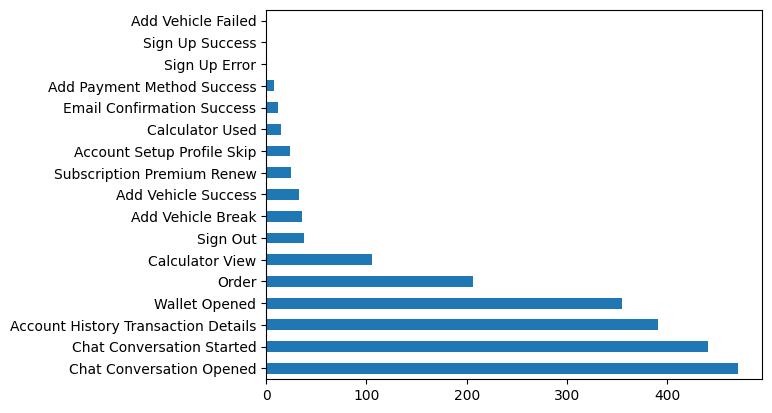

In [197]:
filtered_df['event_name'].value_counts().plot(kind='barh')

<AxesSubplot: >

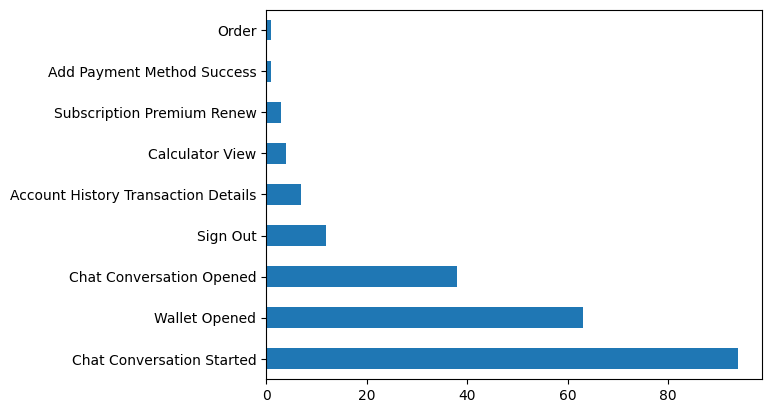

In [218]:
filtered_df.groupby(level=0).last()['event_name'].value_counts().plot(kind='barh')

<AxesSubplot: >

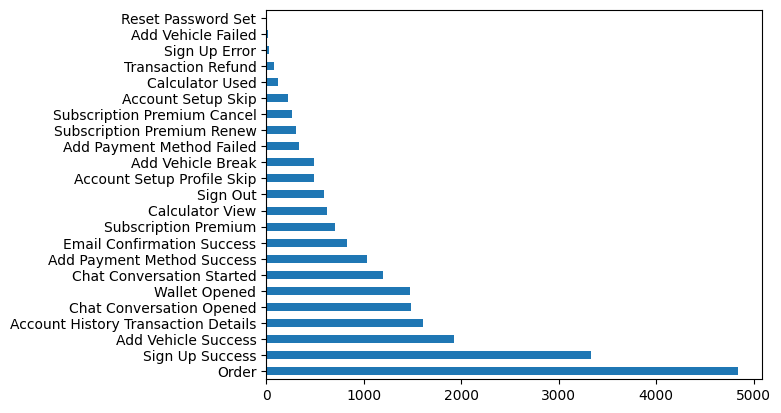

In [203]:
df['event_name'].value_counts().plot(kind='barh')

<AxesSubplot: >

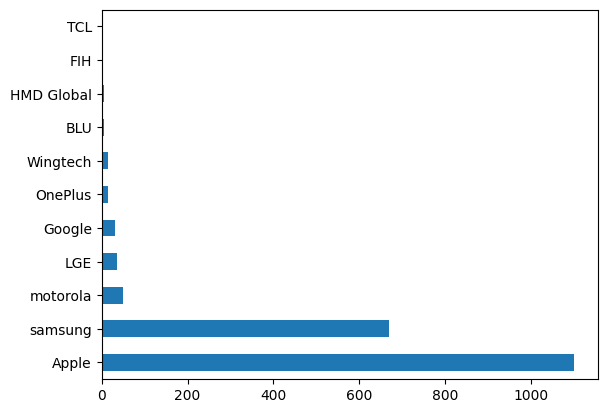

In [199]:
filtered_df['device_manufacture'].value_counts().plot(kind='barh')

<AxesSubplot: >

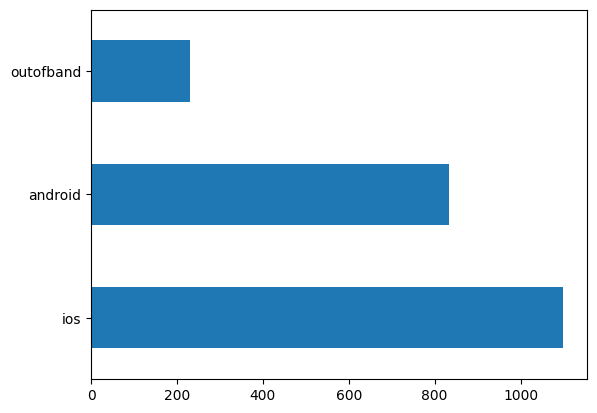

In [200]:
filtered_df['event_platform'].value_counts().plot(kind='barh')

<AxesSubplot: >

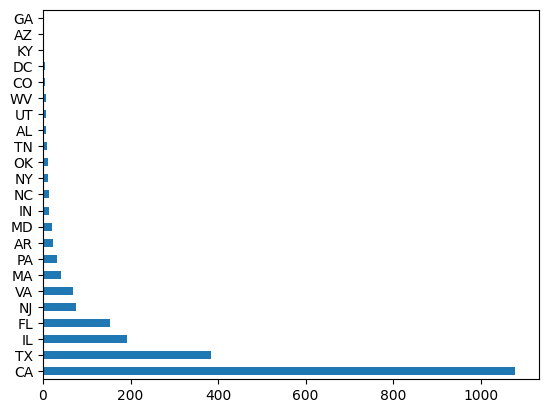

In [201]:
filtered_df['user_state'].value_counts().plot(kind='barh')

<AxesSubplot: >

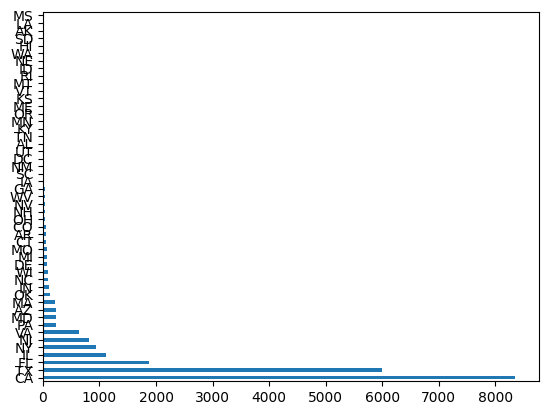

In [230]:
df['user_state'].value_counts().plot(kind='barh')

In [207]:
filtered_df.loc['387c88f25e204376acf003420663fef5']

,user_state,event_name,event_attributes,event_platform,device_manufacture,device_model
event_created_date,,,,,,
2022-04-16 18:53:16,AR,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",android,samsung,SM-G970U
2022-04-16 18:56:00,AR,Wallet Opened,{},android,samsung,SM-G970U


In [208]:
filtered_df.loc['a22abda7a39d747ab674cd13224b375a']

,user_state,event_name,event_attributes,event_platform,device_manufacture,device_model
event_created_date,,,,,,
2022-01-15 23:28:37,FL,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",android,LGE,LM-V350
2022-01-16 02:39:15,FL,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",android,LGE,LM-V350
2022-01-16 02:39:28,FL,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",android,LGE,LM-V350
2022-01-16 02:39:48,FL,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",android,LGE,LM-V350
2022-01-16 02:40:39,FL,Wallet Opened,{},android,LGE,LM-V350
2022-01-22 21:14:00,FL,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",android,LGE,LM-V350
2022-01-22 21:14:25,FL,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",android,LGE,LM-V350
2022-01-22 21:14:36,FL,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",android,LGE,LM-V350
2022-01-22 21:15:56,FL,Wallet Opened,{},android,LGE,LM-V350


In [253]:
filtered_df.loc['387c88f25e204376acf003420663fef5']

,user_state,event_name,event_attributes,event_platform,device_manufacture,device_model
event_created_date,,,,,,
2022-04-16 18:53:16,AR,Account History Transaction Details,"{""Navigated From"":""Account History"",""Status"":""...",android,samsung,SM-G970U
2022-04-16 18:56:00,AR,Wallet Opened,{},android,samsung,SM-G970U
